# Maven Telecom Churn Analysis

**Datasetinfo:**
    Sample Data Set containing Telco customer data and showing customers left last Qurter.

In [1]:
# Import the required library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import panel as pn
pn.extension('tabulator')

import hvplot.pandas

* Load the data file*

In [2]:
Maven_Telecom_data=pd.read_csv('telecom_customer_churn.csv')

In [3]:
Maven_Telecom_data.head(10)

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   
5  0013-MHZWF  Female   23      No                     3      Midpines   
6  0013-SMEOE  Female   67     Yes                     0        Lompoc   
7  0014-BMAQU    Male   52     Yes                     0          Napa   
8  0015-UOCOJ  Female   68      No                     0   Simi Valley   
9  0016-QLJIS  Female   43     Yes                     1      Sheridan   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   
5     95345  37.581496 -119.972762                    0  ...      Credit Card   
6     93437  34.757477 -120.550507                    1  ...  Bank Withdrawal   
7     94558  38.489789 -122.270110                    8  ...      Credit Card   
8     93063  34.296813 -118.685703                    0  ...  Bank Withdrawal   
9     95681  38.984756 -121.345074                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0          65.60        593.30           0.00                        0   
1          -4.00        542.40          38.33                       10   
2          73.90        280.85           0.00                        0   
3          98.00       1237.85           0.00                        0   
4          83.90        267.40           0.00                        0   
5          69.40        571.45           0.00                        0   
6         109.70       7904.25           0.00                        0   
7          84.65       5377.80           0.00                       20   
8          48.20        340.35           0.00                        0   
9          90.45       5957.90           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   
5                      150.93        722.38           Stayed              NaN   
6                      707.16       8611.41           Stayed              NaN   
7                      816.48       6214.28           Stayed              NaN   
8                       73.71        414.06           Stayed              NaN   
9                     1849.90       7807.80           Stayed              NaN   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  
5                            NaN  
6                            NaN  
7                            NaN  
8                            NaN  
9                            NaN  

[10 rows x 38 columns]

In [4]:
Maven_Telecom_data.shape

(7043, 38)

## Data Cleaning

In [8]:
Maven_Telecom_data.columns.values

array(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Churn Category', 'Churn Reason'], dtype=object)

In [7]:
Maven_Telecom_data.dtypes

CustomerID                           object
Gender                               object
Age                                   int64
Married                              object
Number of Dependents                  int64
City                                 object
Zip Code                              int64
Latitude                            float64
Longitude                           float64
Number of Referrals                   int64
Tenure_in_Months                      int64
Offer                                object
Phone_Service                        object
Avg_Monthly_LongDistance_Charges    float64
Multiple_Lines                       object
Internet_Service                     object
Internet_Type                        object
Avg Monthly GB Download             float64
Online Security                      object
Online Backup                        object
Device Protection Plan               object
Premium Tech Support                 object
Streaming TV                    

In [6]:
#Rename column Names their should be no space between words
Maven_Telecom_data.rename(columns={'Customer ID':'CustomerID','Tenure in Months':'Tenure_in_Months','Phone Service':'Phone_Service',
                             'Avg Monthly Long Distance Charges':'Avg_Monthly_LongDistance_Charges','Multiple Lines':'Multiple_Lines',
                            'Internet Service':'Internet Service','Payment Method':'Payment_Method','Monthly Charge':'Monthly_Charge',
                            'Total Charges':'Total_Charges','Total Extra Data Charges':'Total Extra_Data_Charges','Total Long Distance Charges':'Total_Long_Distance_Charges',
                            'Total Revenue':'Total_Revenue','Churn Category':'Churn_Category','Churn Reason':'Churn_Reason','Customer Status':'Customer_Status',
                            'Internet Service':'Internet_Service','Internet Type':'Internet_Type'},inplace=True)

In [8]:
Maven_Telecom_data.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure_in_Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg_Monthly_LongDistance_Charges  Avg Monthly GB Download  \
count                       6361.000000              5517.000000   
mean                          25.420517                26.189958   
std                           14.200374                19.586585   
min                            1.010000                 2.000000   
25%                           13.050000                13.000000   
50%                           25.690000                21.000000   
75%                           37.680000                30.000000   
max                           49.990000                85.000000   

       Monthly_Charge  Total_Charges  Total Refunds  Total Extra_Data_Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total_Long_Distance_Charges  Total_Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

75% Customers Tenure in companey is less than 55 months.
Customers are paying 63 dollers Average monthly charge. 

In [9]:
Maven_Telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustomerID                        7043 non-null   object 
 1   Gender                            7043 non-null   object 
 2   Age                               7043 non-null   int64  
 3   Married                           7043 non-null   object 
 4   Number of Dependents              7043 non-null   int64  
 5   City                              7043 non-null   object 
 6   Zip Code                          7043 non-null   int64  
 7   Latitude                          7043 non-null   float64
 8   Longitude                         7043 non-null   float64
 9   Number of Referrals               7043 non-null   int64  
 10  Tenure_in_Months                  7043 non-null   int64  
 11  Offer                             7043 non-null   object 
 12  Phone_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


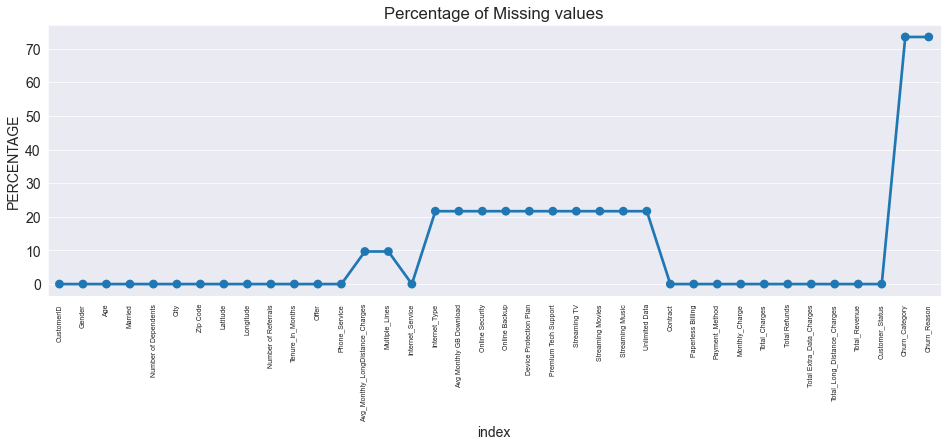

In [10]:
missing = pd.DataFrame((Maven_Telecom_data.isnull().sum())*100/Maven_Telecom_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [11]:
Telecom_data=Maven_Telecom_data.copy()

#### Missing Data
1.Here Is_phone service is no then no avg-monthly-long-dist-charged and no multiple lines.
2.here if no internet then other services related internet like online security,streming_Tv also nan.
3.if customer status is not churned then no churn catogory and reason.

So here no missing values.


In [12]:
Telecom_data['Tenure_in_Months'].max()

72

In [13]:
# Group the tenure in bins of 12 months
labels=["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
Telecom_data['Tenure_Groups']=pd.cut(Telecom_data.Tenure_in_Months, range(1, 80, 12), right=False, labels=labels)



In [14]:
#drop column customerID and tenure
Telecom_data.drop(columns= ['Tenure_in_Months','City','Zip Code','Latitude','Longitude','Number of Referrals','CustomerID'], axis=1, inplace=True)
Telecom_data.head()

Gender  Age Married  Number of Dependents    Offer Phone_Service  \
0  Female   37     Yes                     0     None           Yes   
1    Male   46      No                     0     None           Yes   
2    Male   50      No                     0  Offer E           Yes   
3    Male   78     Yes                     0  Offer D           Yes   
4  Female   75     Yes                     0     None           Yes   

   Avg_Monthly_LongDistance_Charges Multiple_Lines Internet_Service  \
0                             42.39             No              Yes   
1                             10.69            Yes              Yes   
2                             33.65             No              Yes   
3                             27.82             No              Yes   
4                              7.38             No              Yes   

  Internet_Type  ...  Monthly_Charge Total_Charges Total Refunds  \
0         Cable  ...            65.6        593.30          0.00   
1         Cable  ...            -4.0        542.40         38.33   
2   Fiber Optic  ...            73.9        280.85          0.00   
3   Fiber Optic  ...            98.0       1237.85          0.00   
4   Fiber Optic  ...            83.9        267.40          0.00   

  Total Extra_Data_Charges Total_Long_Distance_Charges Total_Revenue  \
0                        0                      381.51        974.81   
1                       10                       96.21        610.28   
2                        0                      134.60        415.45   
3                        0                      361.66       1599.51   
4                        0                       22.14        289.54   

  Customer_Status   Churn_Category                   Churn_Reason  \
0          Stayed              NaN                            NaN   
1          Stayed              NaN                            NaN   
2         Churned       Competitor  Competitor had better devices   
3         Churned  Dissatisfaction        Product dissatisfaction   
4         Churned  Dissatisfaction            Network reliability   

  Tenure_Groups  
0        1 - 12  
1        1 - 12  
2        1 - 12  
3       13 - 24  
4        1 - 12  

[5 rows x 32 columns]

In [15]:
Total_Revenue=Telecom_data['Total_Revenue'].sum()
print('Total Revenue of Qurter three is {}$.'.format(Total_Revenue))

Total Revenue of Qurter three is 21371131.69$.


In [16]:
Total_customers=Telecom_data.count()
Total_customers

Gender                              7043
Age                                 7043
Married                             7043
Number of Dependents                7043
Offer                               7043
Phone_Service                       7043
Avg_Monthly_LongDistance_Charges    6361
Multiple_Lines                      6361
Internet_Service                    7043
Internet_Type                       5517
Avg Monthly GB Download             5517
Online Security                     5517
Online Backup                       5517
Device Protection Plan              5517
Premium Tech Support                5517
Streaming TV                        5517
Streaming Movies                    5517
Streaming Music                     5517
Unlimited Data                      5517
Contract                            7043
Paperless Billing                   7043
Payment_Method                      7043
Monthly_Charge                      7043
Total_Charges                       7043
Total Refunds   

In [17]:
Churned_df=Telecom_data.query('Customer_Status=="Churned"')
Churned_df

Gender  Age Married  Number of Dependents    Offer Phone_Service  \
2       Male   50      No                     0  Offer E           Yes   
3       Male   78     Yes                     0  Offer D           Yes   
4     Female   75     Yes                     0     None           Yes   
18      Male   79      No                     0     None           Yes   
19      Male   67      No                     0     None            No   
...      ...  ...     ...                   ...      ...           ...   
7020    Male   79      No                     0     None           Yes   
7023    Male   73      No                     0     None           Yes   
7036  Female   53      No                     0  Offer E           Yes   
7037  Female   36      No                     0     None           Yes   
7039    Male   40     Yes                     0  Offer D           Yes   

      Avg_Monthly_LongDistance_Charges Multiple_Lines Internet_Service  \
2                                33.65             No              Yes   
3                                27.82             No              Yes   
4                                 7.38             No              Yes   
18                               10.67             No              Yes   
19                                 NaN            NaN              Yes   
...                                ...            ...              ...   
7020                             42.27             No              Yes   
7023                             10.04            Yes              Yes   
7036                             42.09             No              Yes   
7037                              2.01             No               No   
7039                             16.20            Yes              Yes   

     Internet_Type  ...  Monthly_Charge Total_Charges Total Refunds  \
2      Fiber Optic  ...           73.90        280.85           0.0   
3      Fiber Optic  ...           98.00       1237.85           0.0   
4      Fiber Optic  ...           83.90        267.40           0.0   
18             DSL  ...           62.70       2791.50           0.0   
19           Cable  ...           25.10         25.10           0.0   
...            ...  ...             ...           ...           ...   
7020   Fiber Optic  ...           -1.00       2030.30          10.2   
7023   Fiber Optic  ...           83.85        790.15           0.0   
7036   Fiber Optic  ...           70.15         70.15           0.0   
7037           NaN  ...           20.95         85.50           0.0   
7039   Fiber Optic  ...           85.10       1873.70           0.0   

     Total Extra_Data_Charges Total_Long_Distance_Charges Total_Revenue  \
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
18                          0                      480.15       3271.65   
19                          0                        0.00         25.10   
...                       ...                         ...           ...   
7020                        0                      887.67       2907.77   
7023                        0                       90.36        880.51   
7036                        0                       42.09        112.24   
7037                        0                        8.04         93.54   
7039                        0                      356.40       2230.10   

     Customer_Status   Churn_Category                   Churn_Reason  \
2            Churned       Competitor  Competitor had better devices   
3            Churned  Dissatisfaction        Product dissatisfaction   
4            Churned  Dissatisfaction            Network reliability   
18           Churned  Dissatisfaction      Limited range of services   
19           Churned       Competitor   Competitor made better offer   
...              ...              ...     

In [18]:
churned_cust=Churned_df['Customer_Status'].count()
churned_cust
print('total churned customers are {}.'.format(churned_cust))

total churned customers are 1869.


## Data Exploration

*1*plot distribution of individual pridictors by churn

### Univariant Analysis

In [19]:
Telecom_data['churn']= np.where(Telecom_data.Customer_Status=='Churned','Yes','NO')


C:\Users\MJ\AppData\Local\Temp\ipykernel_18672\2789135244.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


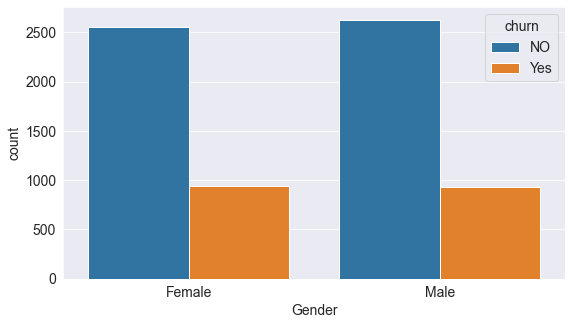

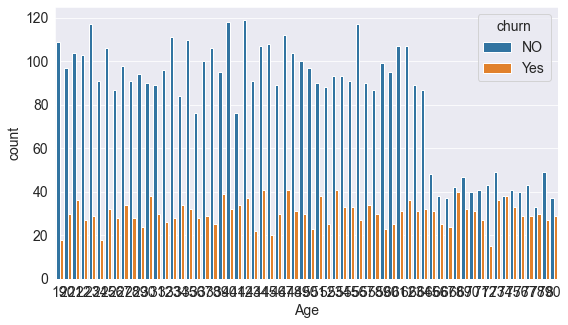

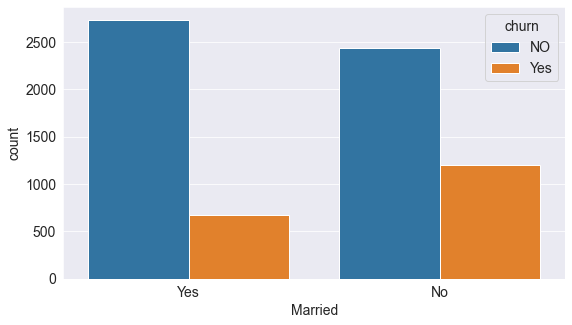

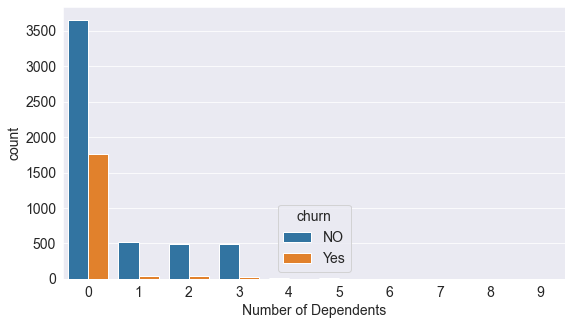

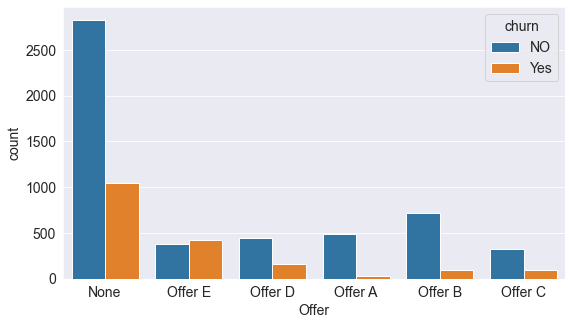

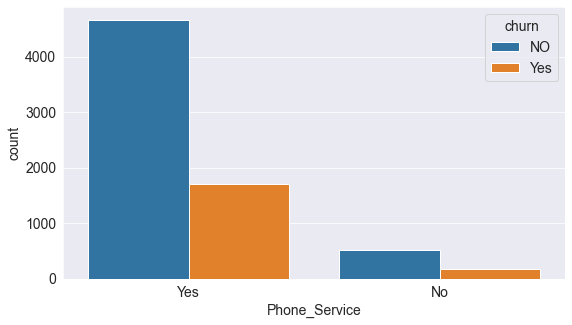

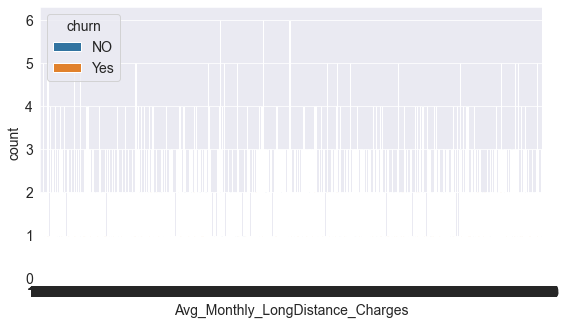

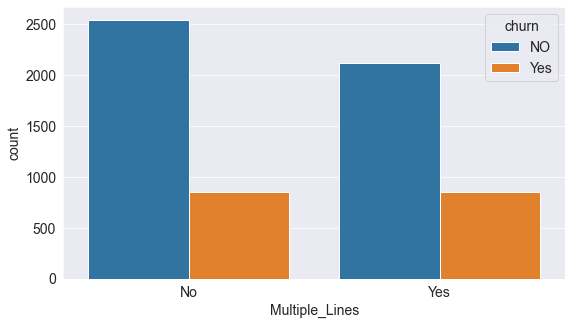

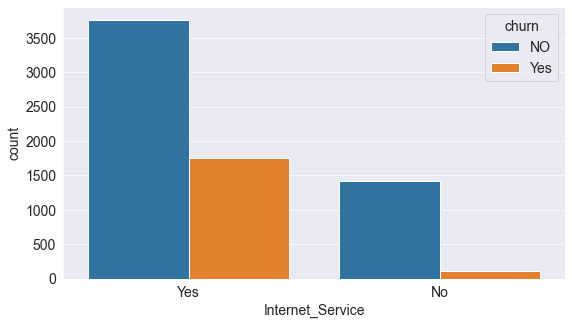

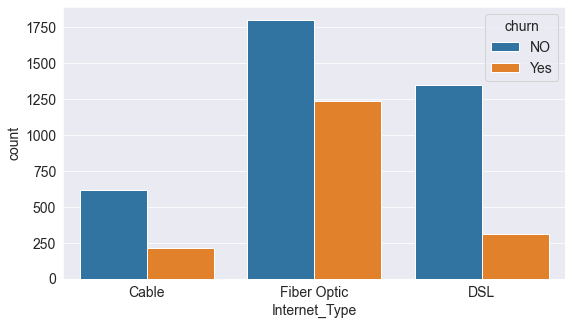

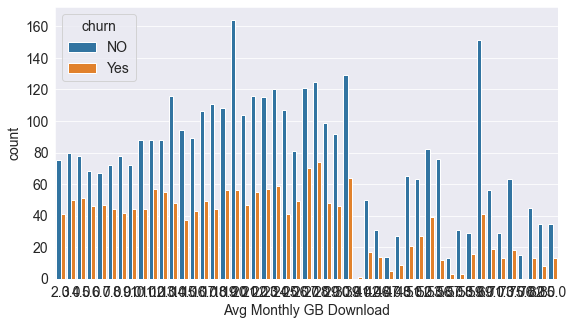

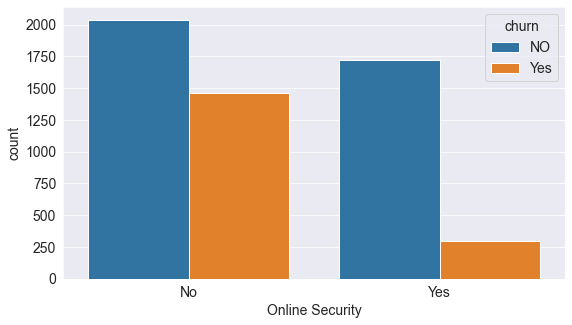

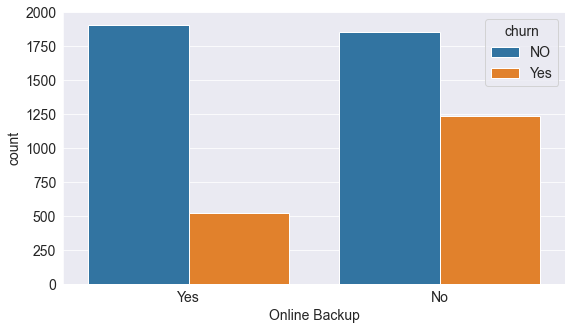

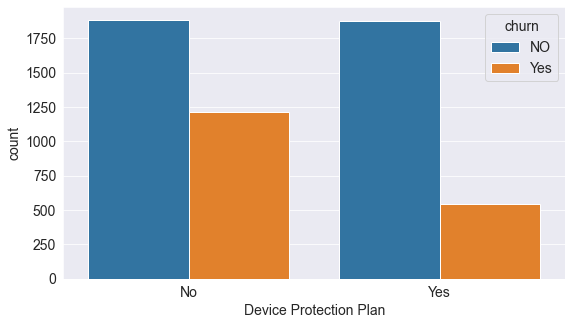

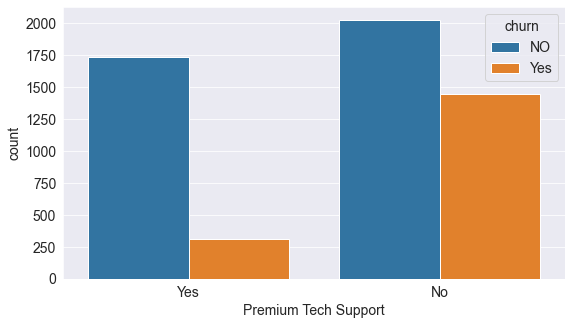

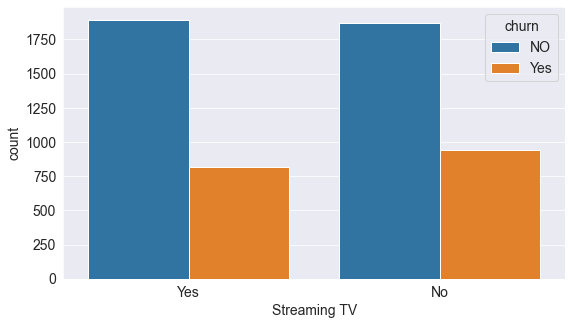

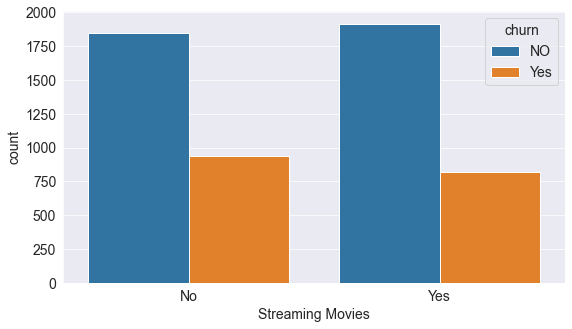

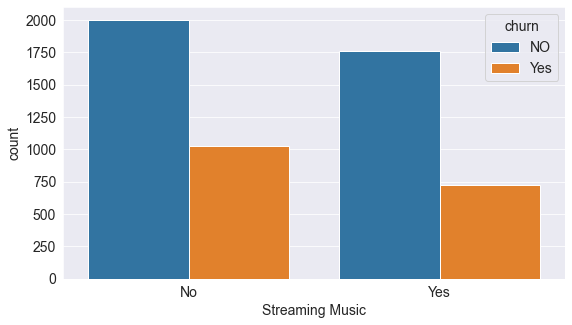

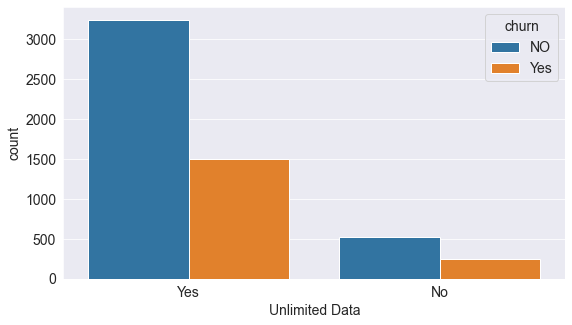

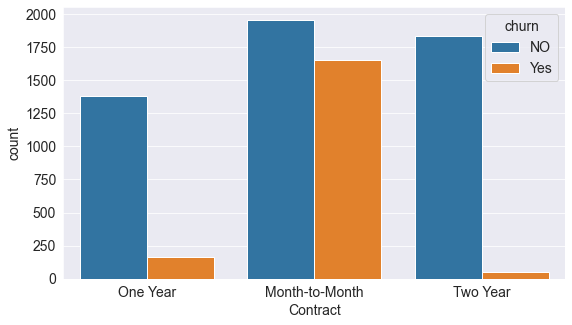

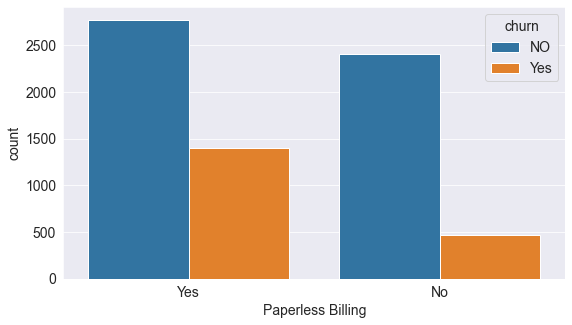

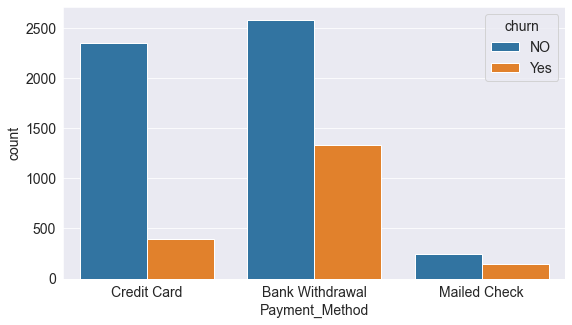

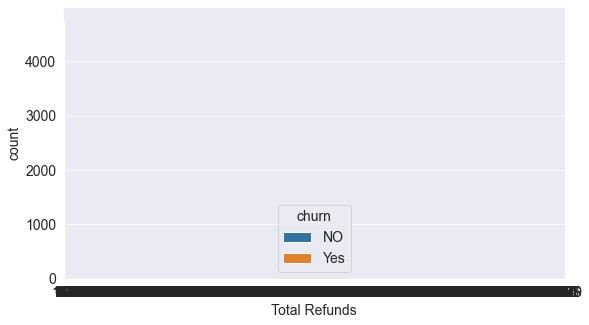

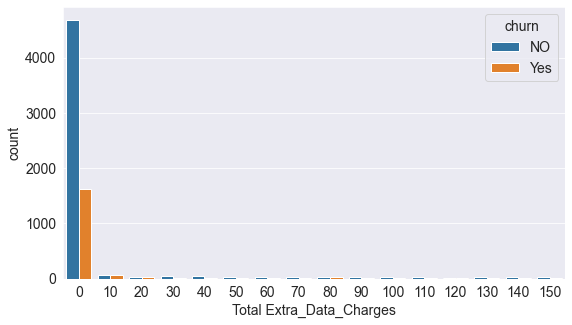

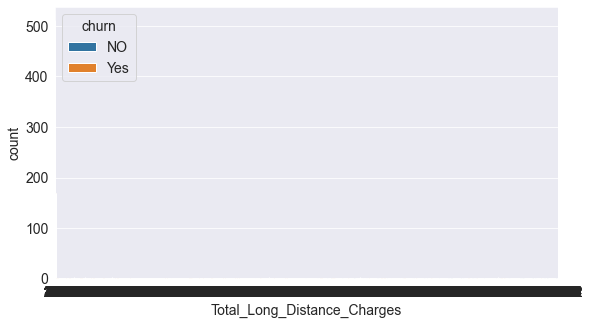

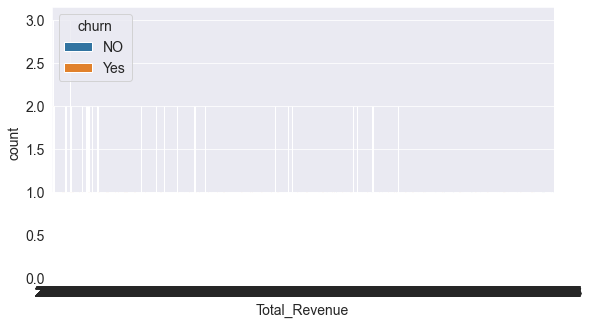

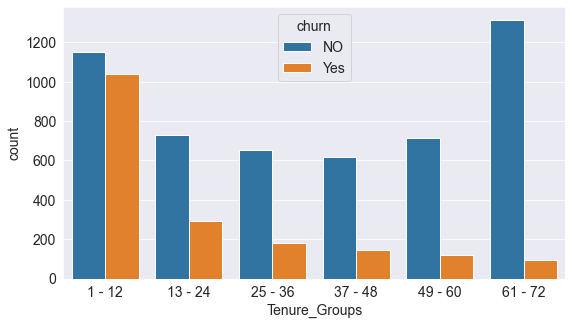

In [22]:
for i, predictor in enumerate(Telecom_data.drop(columns=['churn', 'Total_Charges', 'Monthly_Charge','Churn_Category','Customer_Status',
                                                         'Churn_Reason'])):
    plt.figure(i)
    sns.countplot(data=Telecom_data, x=predictor, hue='churn')

In [20]:
Telecom_data.head()

Gender  Age Married  Number of Dependents    Offer Phone_Service  \
0  Female   37     Yes                     0     None           Yes   
1    Male   46      No                     0     None           Yes   
2    Male   50      No                     0  Offer E           Yes   
3    Male   78     Yes                     0  Offer D           Yes   
4  Female   75     Yes                     0     None           Yes   

   Avg_Monthly_LongDistance_Charges Multiple_Lines Internet_Service  \
0                             42.39             No              Yes   
1                             10.69            Yes              Yes   
2                             33.65             No              Yes   
3                             27.82             No              Yes   
4                              7.38             No              Yes   

  Internet_Type  ...  Total_Charges Total Refunds Total Extra_Data_Charges  \
0         Cable  ...         593.30          0.00                        0   
1         Cable  ...         542.40         38.33                       10   
2   Fiber Optic  ...         280.85          0.00                        0   
3   Fiber Optic  ...        1237.85          0.00                        0   
4   Fiber Optic  ...         267.40          0.00                        0   

  Total_Long_Distance_Charges Total_Revenue Customer_Status   Churn_Category  \
0                      381.51        974.81          Stayed              NaN   
1                       96.21        610.28          Stayed              NaN   
2                      134.60        415.45         Churned       Competitor   
3                      361.66       1599.51         Churned  Dissatisfaction   
4                       22.14        289.54         Churned  Dissatisfaction   

                    Churn_Reason Tenure_Groups churn  
0                            NaN        1 - 12    NO  
1                            NaN        1 - 12    NO  
2  Competitor had better devices        1 - 12   Yes  
3        Product dissatisfaction       13 - 24   Yes  
4            Network reliability        1 - 12   Yes  

[5 rows x 33 columns]

#### total Customers by Status

In [22]:
cust_status=Telecom_data['Customer_Status'].value_counts()
cust_status

Stayed     4720
Churned    1869
Joined      454
Name: Customer_Status, dtype: int64

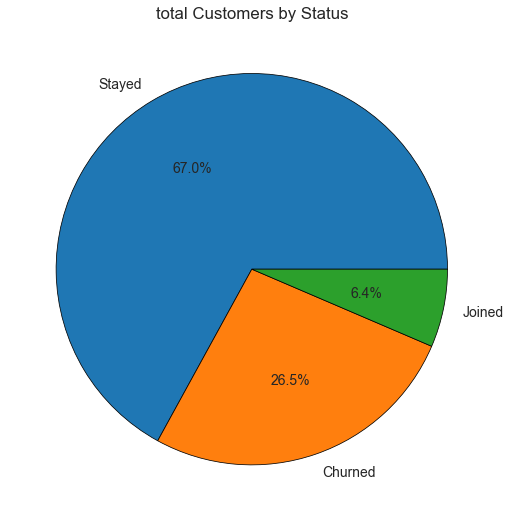

In [24]:
plt.figure(figsize=(12,9))
plt.title('total Customers by Status')
plt.pie(cust_status, labels=cust_status.index,autopct='%1.1f%%',
         wedgeprops = {'edgecolor' : 'black', 'linewidth' : 0.75, 'antialiased' : True})
plt.show()

In [25]:
Revenueloss=Churned_df.Total_Revenue.sum()
Revenueloss
print('26.5 % churn customer cause  $ {} revenue loss.'.format(Revenueloss))

26.5 % churn customer cause  $ 3684459.8200000003 revenue loss.


In [26]:
cust_age=Churned_df[['Age','Customer_Status']].groupby('Age').count()
cust_age

Customer_Status
Age                 
19                18
20                30
21                36
22                27
23                29
..               ...
76                29
77                29
78                30
79                27
80                29

[62 rows x 1 columns]

#### curn customers by age group

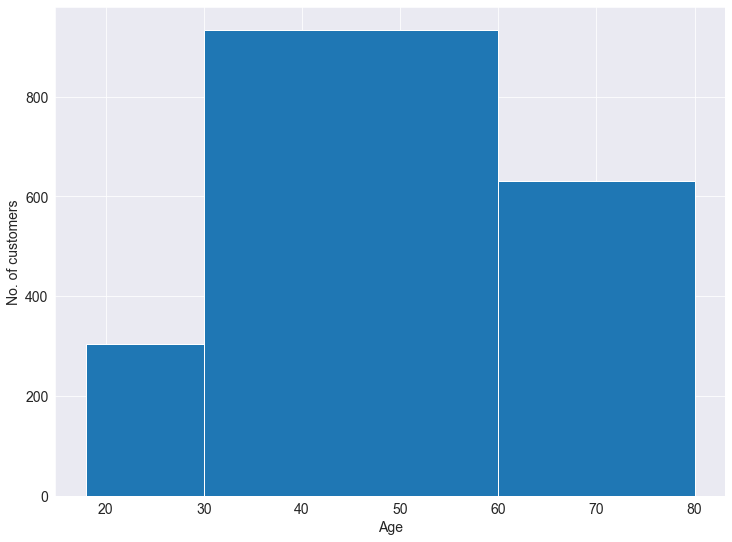

In [27]:
plt.figure(figsize=(12,9))
plt.hist(Churned_df.Age, bins=[18,30,60,80])
plt.xlabel('Age')
plt.ylabel('No. of customers')
plt.show()

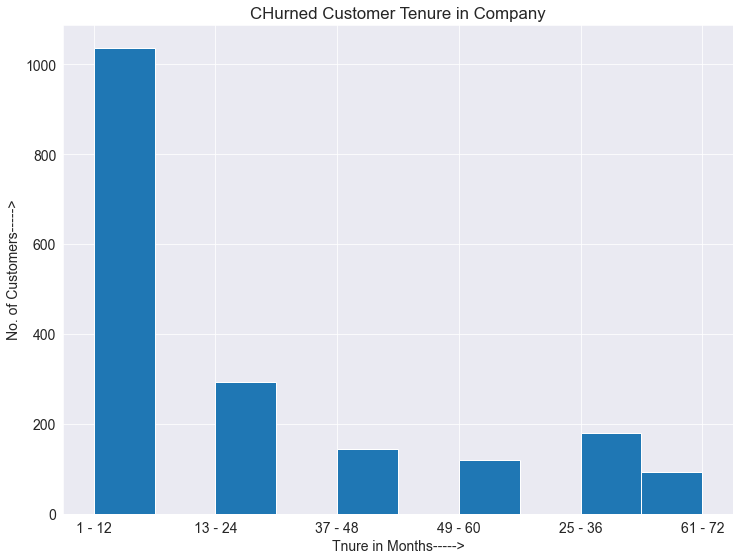

In [28]:
plt.figure(figsize=(12,9))
plt.hist(Churned_df.Tenure_Groups)
 
plt.title('CHurned Customer Tenure in Company')
plt.xlabel('Tnure in Months----->')
plt.ylabel('No. of Customers----->')
plt.show()

In [29]:
Cust_gender=Churned_df[['Customer_Status','Gender']].groupby('Gender').count()
Cust_gender

Customer_Status
Gender                 
Female              939
Male                930

Text(0.5, 1.02, 'Churned customers by gender')

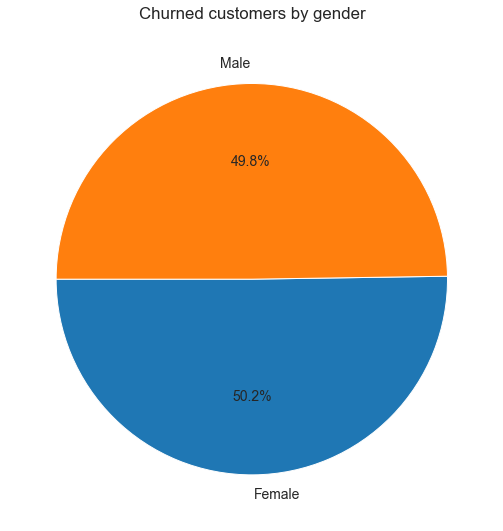

In [30]:
plt.figure(figsize=(9,9))
plt.pie(Cust_gender.Customer_Status,labels=Cust_gender.index,autopct='%1.1f%%',startangle=180)
plt.title('Churned customers by gender',y=1.02)

In [31]:
Telecom_data['churn']= np.where(Telecom_data.Customer_Status=='Churned',1,0)
Telecom_data.head()

Gender  Age Married  Number of Dependents    Offer Phone_Service  \
0  Female   37     Yes                     0     None           Yes   
1    Male   46      No                     0     None           Yes   
2    Male   50      No                     0  Offer E           Yes   
3    Male   78     Yes                     0  Offer D           Yes   
4  Female   75     Yes                     0     None           Yes   

   Avg_Monthly_LongDistance_Charges Multiple_Lines Internet_Service  \
0                             42.39             No              Yes   
1                             10.69            Yes              Yes   
2                             33.65             No              Yes   
3                             27.82             No              Yes   
4                              7.38             No              Yes   

  Internet_Type  ...  Total_Charges Total Refunds Total Extra_Data_Charges  \
0         Cable  ...         593.30          0.00                        0   
1         Cable  ...         542.40         38.33                       10   
2   Fiber Optic  ...         280.85          0.00                        0   
3   Fiber Optic  ...        1237.85          0.00                        0   
4   Fiber Optic  ...         267.40          0.00                        0   

  Total_Long_Distance_Charges Total_Revenue Customer_Status   Churn_Category  \
0                      381.51        974.81          Stayed              NaN   
1                       96.21        610.28          Stayed              NaN   
2                      134.60        415.45         Churned       Competitor   
3                      361.66       1599.51         Churned  Dissatisfaction   
4                       22.14        289.54         Churned  Dissatisfaction   

                    Churn_Reason Tenure_Groups churn  
0                            NaN        1 - 12     0  
1                            NaN        1 - 12     0  
2  Competitor had better devices        1 - 12     1  
3        Product dissatisfaction       13 - 24     1  
4            Network reliability        1 - 12     1  

[5 rows x 33 columns]

In [32]:
# convert all catogorical variables into dummy variables

telecom_dummies_df=pd.get_dummies(Telecom_data)
telecom_dummies_df.head(10)

Age  Number of Dependents  Avg_Monthly_LongDistance_Charges  \
0   37                     0                             42.39   
1   46                     0                             10.69   
2   50                     0                             33.65   
3   78                     0                             27.82   
4   75                     0                              7.38   
5   23                     3                             16.77   
6   67                     0                              9.96   
7   52                     0                             12.96   
8   68                     0                             10.53   
9   43                     1                             28.46   

   Avg Monthly GB Download  Monthly_Charge  Total_Charges  Total Refunds  \
0                     16.0           65.60         593.30           0.00   
1                     10.0           -4.00         542.40          38.33   
2                     30.0           73.90         280.85           0.00   
3                      4.0           98.00        1237.85           0.00   
4                     11.0           83.90         267.40           0.00   
5                     73.0           69.40         571.45           0.00   
6                     14.0          109.70        7904.25           0.00   
7                      7.0           84.65        5377.80           0.00   
8                     21.0           48.20         340.35           0.00   
9                     14.0           90.45        5957.90           0.00   

   Total Extra_Data_Charges  Total_Long_Distance_Charges  Total_Revenue  ...  \
0                         0                       381.51         974.81  ...   
1                        10                        96.21         610.28  ...   
2                         0                       134.60         415.45  ...   
3                         0                       361.66        1599.51  ...   
4                         0                        22.14         289.54  ...   
5                         0                       150.93         722.38  ...   
6                         0                       707.16        8611.41  ...   
7                        20                       816.48        6214.28  ...   
8                         0                        73.71         414.06  ...   
9                         0                      1849.90        7807.80  ...   

   Churn_Reason_Poor expertise of phone support  Churn_Reason_Price too high  \
0                                             0                            0   
1                                             0                            0   
2                                             0                            0   
3                                             0                            0   
4                                             0                            0   
5                                             0                            0   
6                                             0                            0   
7                                             0                            0   
8                                             0                            0   
9                                             0                            0   

   Churn_Reason_Product dissatisfaction  Churn_Reason_Service dissatisfaction  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   
5                                     0                                     0   
6                                     0                                     0   
7                            

*5* Relation between monthly charges and total charges

<Figure size 864x648 with 0 Axes>

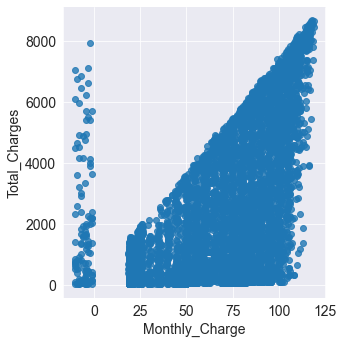

In [36]:
plt.figure(figsize=(12,9))
sns.lmplot(data=telecom_dummies_df, x='Monthly_Charge', y='Total_Charges', fit_reg=False)

**Insight:** Monthly Charge increase as total charges increases.

**6.** churn by monthly charges and total charges.

Text(0.5, 1.0, 'Monthly charges by churn')

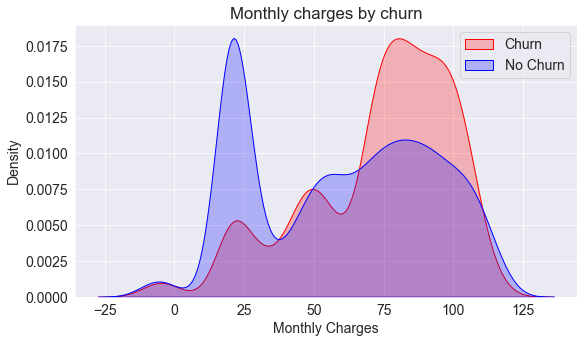

In [37]:
yz=sns.kdeplot(telecom_dummies_df.Monthly_Charge[(telecom_dummies_df['churn']==1)],color='Red',shade=True)
yz=sns.kdeplot(telecom_dummies_df.Monthly_Charge[(telecom_dummies_df['churn']==0)], color='Blue', shade=True)
yz.legend(['Churn','No Churn'],loc='upper right')
yz.set_ylabel('Density')
yz.set_xlabel('Monthly Charges')
yz.set_title('Monthly charges by churn')



**Insight:** Churn is high when monthly charge is high.

Text(0.5, 1.0, 'Total charges by churn')

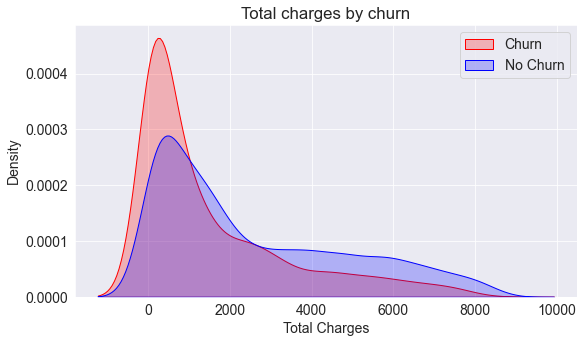

In [38]:
yz=sns.kdeplot(telecom_dummies_df.Total_Charges[(telecom_dummies_df['churn']==1)],color='Red',shade=True)
yz=sns.kdeplot(telecom_dummies_df.Total_Charges[(telecom_dummies_df['churn']==0)], color='Blue', shade=True)
yz.legend(['Churn','No Churn'],loc='upper right')
yz.set_ylabel('Density')
yz.set_xlabel('Total Charges')
yz.set_title('Total charges by churn')


**Surprising Insight** as higher churn at lower Total Charges.
 
However if we combine three insights i.e Tenure, Monthly charges and Total Charges then picture is bit clear
:-High Monthly charges at lower tenure results into lower total charge. Hence All tis three factors **lower Tenure** 
**Higher Monthly_charge** and **lower Total_charges** are linkd to **High Churn **.

**7.** Build Correlation of all pridictor with churn

<AxesSubplot:>

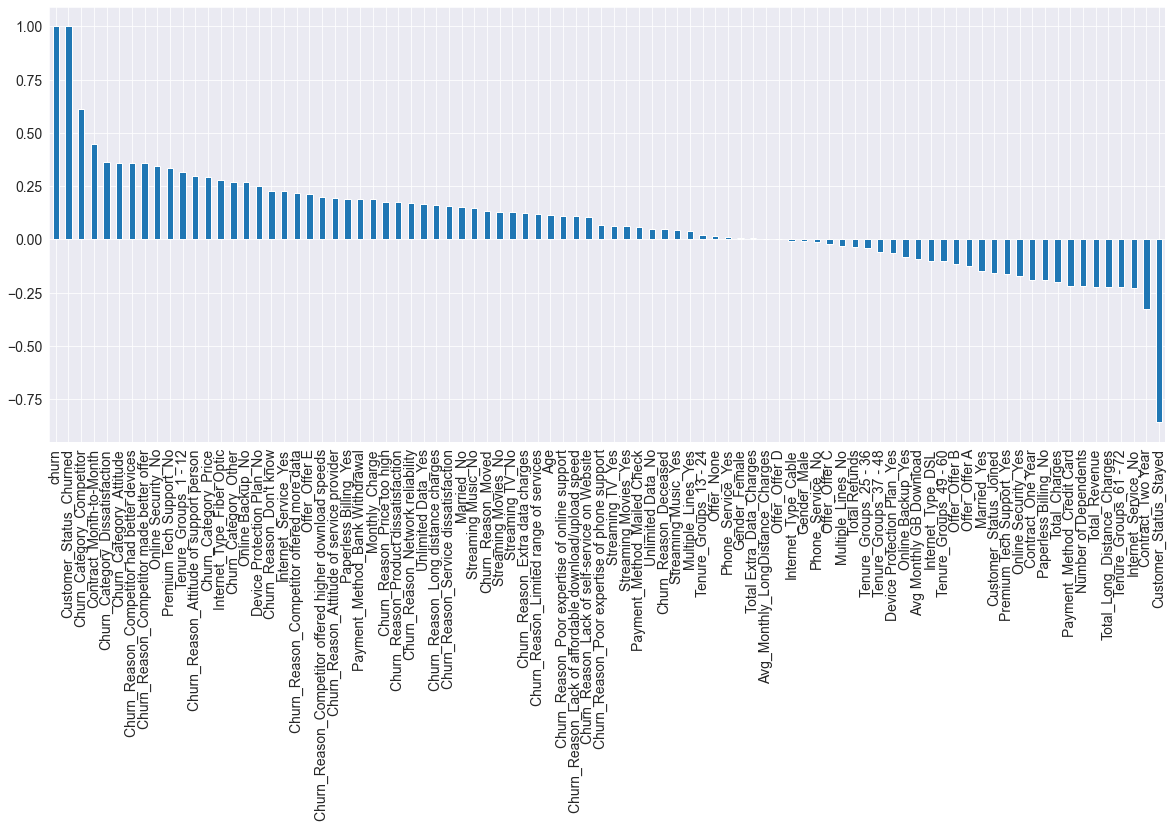

In [39]:
plt.figure(figsize=(20,8))
telecom_dummies_df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

*Insights:-*
**High** churn in **Month-to-month contractS**, **No online security**,**No premium tech Support**,**Fiber optics internet**,
         and **Association less than year.**
**Low**  churn in **long term contract**, **subcription with no internet service**, **association more than 5+ years**,
         and **have primium tech support**.
         **Gender**, **Avilability ofphone service**, **Long distance charges**, **Multiple lines** have almost **No** impact            on churn.
  
More than **60%** churn is due to competitor and reasons are,
         * Competitor **have better devices**
         * Competitor **Made better offer**
         
         This also can be seen from **heatmap**.

<AxesSubplot:>

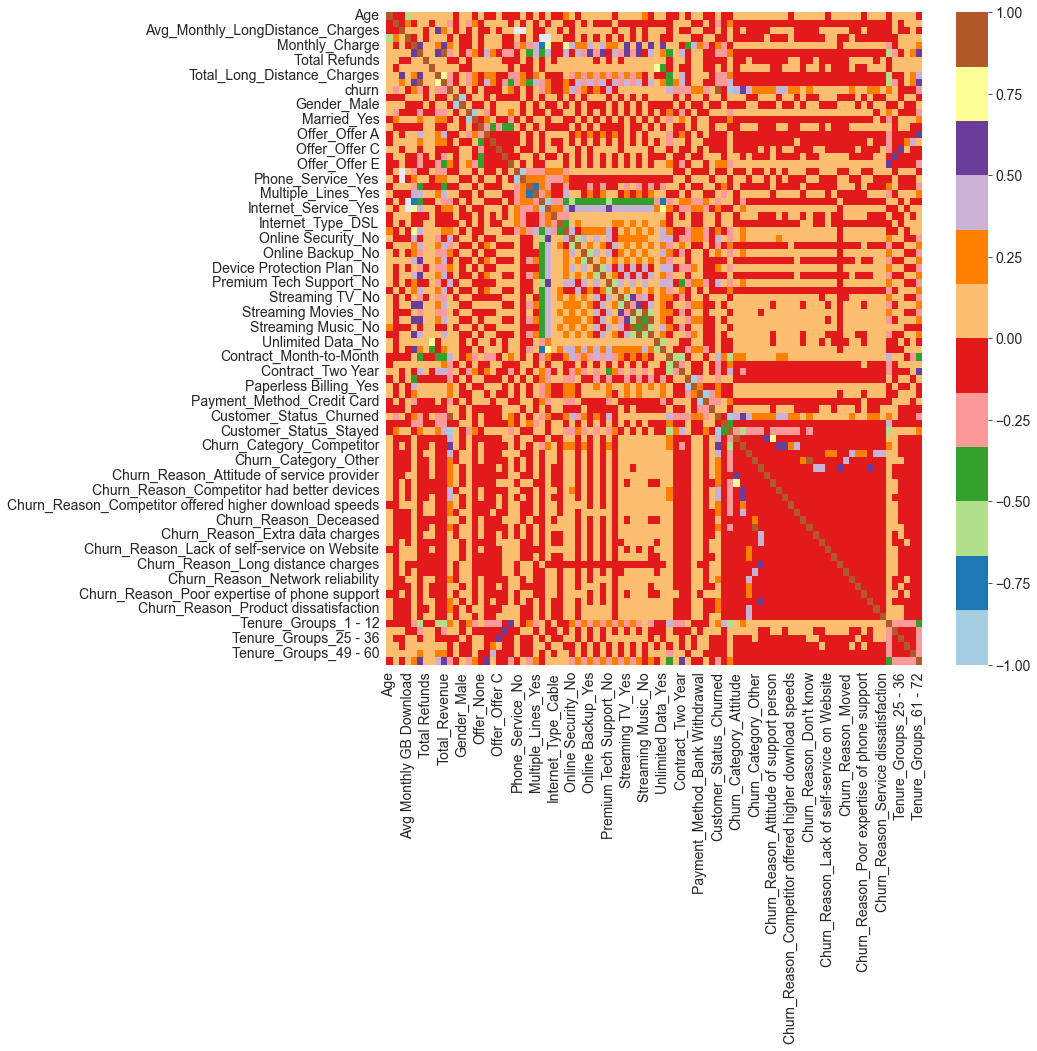

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(telecom_dummies_df.corr(), cmap="Paired")

## Bivarent Analysis

In [41]:
new_df_0=Telecom_data.loc[Telecom_data['churn']==0]
new_df_1=Telecom_data.loc[Telecom_data['churn']==1]

In [42]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp=pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

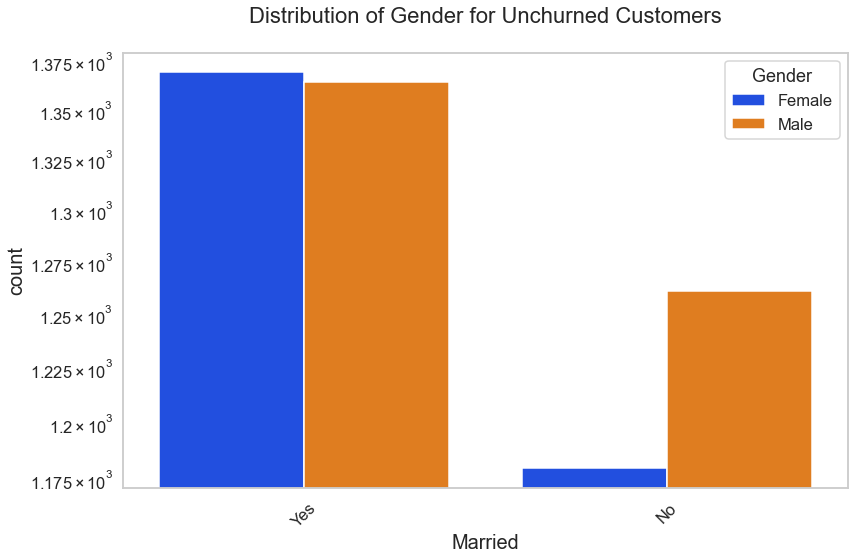

In [43]:
uniplot(new_df_0, col='Married',title='Distribution of Gender for Unchurned Customers',hue='Gender')

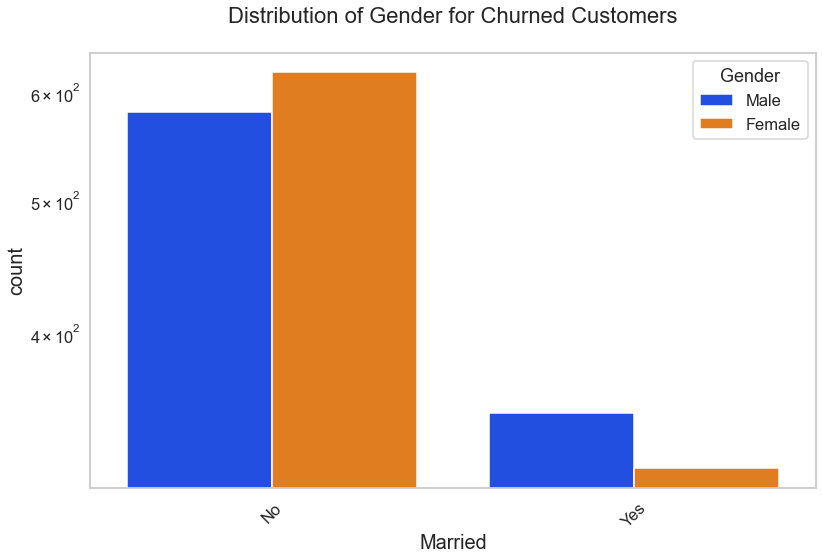

In [44]:
uniplot(new_df_1, col='Married',title='Distribution of Gender for Churned Customers',hue='Gender')

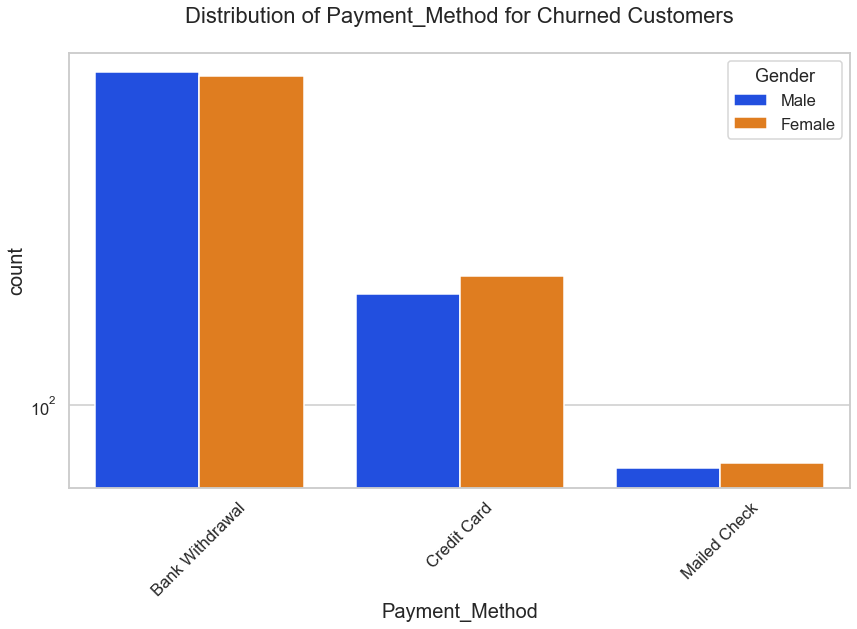

In [45]:
uniplot(new_df_1, col='Payment_Method',title='Distribution of Payment_Method for Churned Customers',hue='Gender')

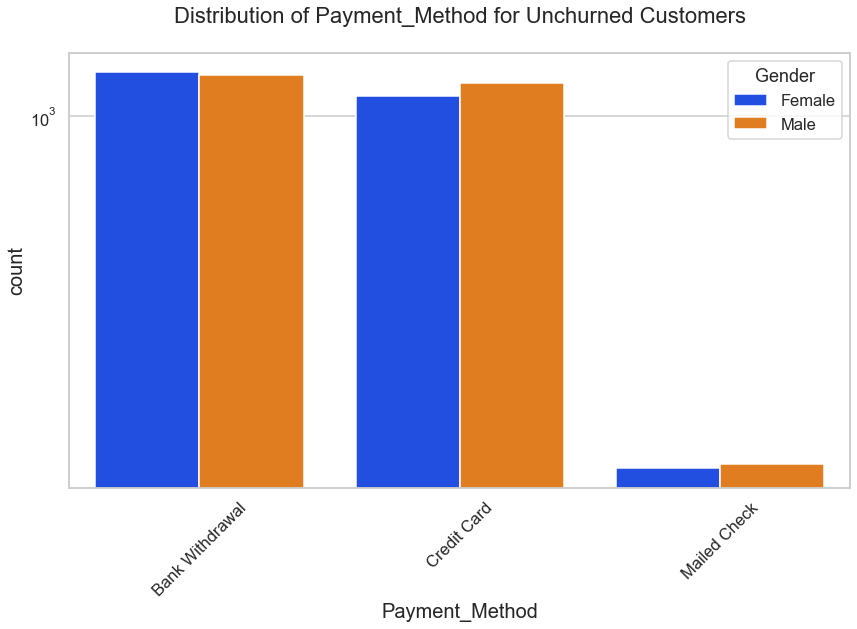

In [46]:
uniplot(new_df_0, col='Payment_Method',title='Distribution of Payment_Method for Unchurned Customers',hue='Gender')

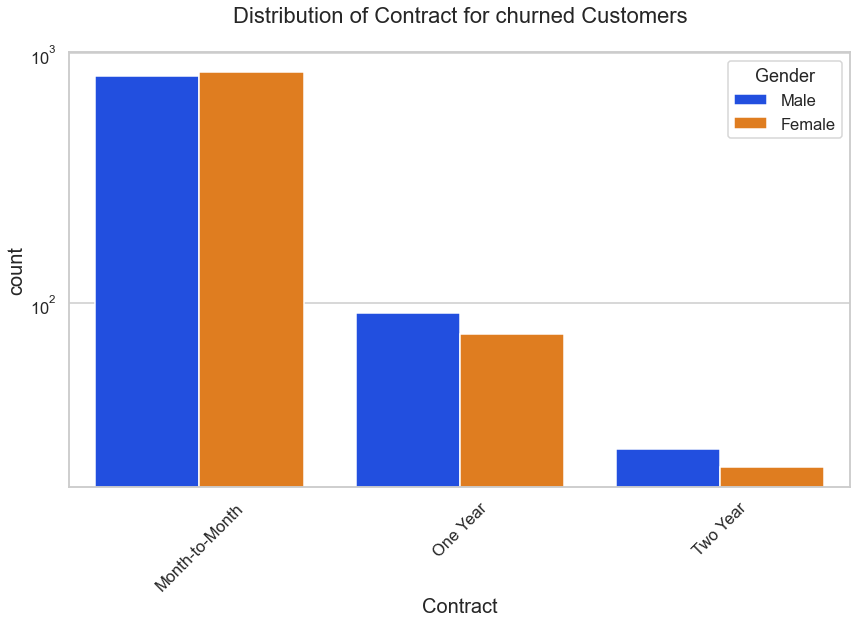

In [47]:
uniplot(new_df_1, col='Contract',title='Distribution of Contract for churned Customers',hue='Gender')

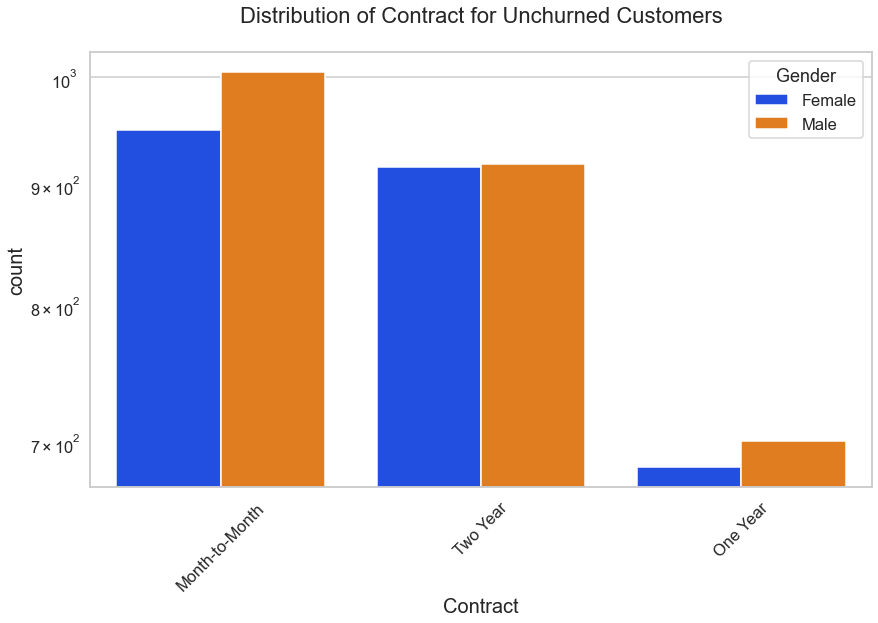

In [48]:
uniplot(new_df_0, col='Contract',title='Distribution of Contract for Unchurned Customers',hue='Gender')

## Conclusion

These are some of the quick insights from this exercise:

Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners.

In [61]:
telecom_dummies_df.to_csv('telecom_dummies_df.csv')